<a href="https://colab.research.google.com/github/shaik-zeenath-kousar/EliteTech-Intern/blob/main/Task_4_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io

In [2]:
print("📂 Please upload your 'customers.csv' file")
uploaded = files.upload()

📂 Please upload your 'customers.csv' file


Saving customers.csv to customers.csv


In [3]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
print("\n📊 First few rows of the dataset:")
display(df.head())


📊 First few rows of the dataset:


,CustomerID,Age,Annual Income(k$),Spending Score
0,1,22,35,81
1,2,34,75,39
2,3,25,50,77
3,4,45,85,40
4,5,52,62,50


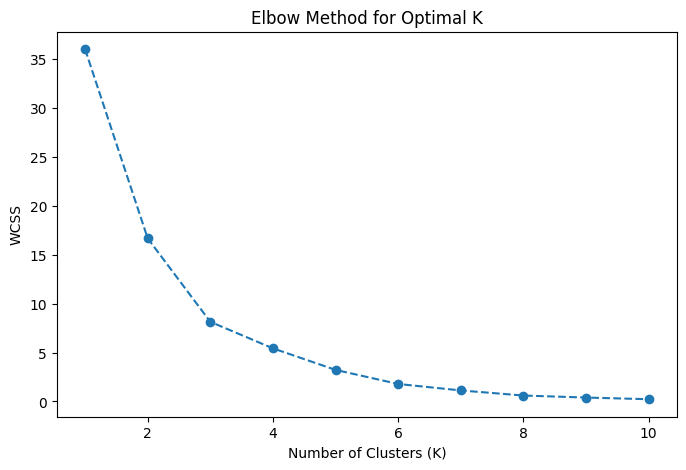

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["Age", "Annual Income(k$)", "Spending Score"]])
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

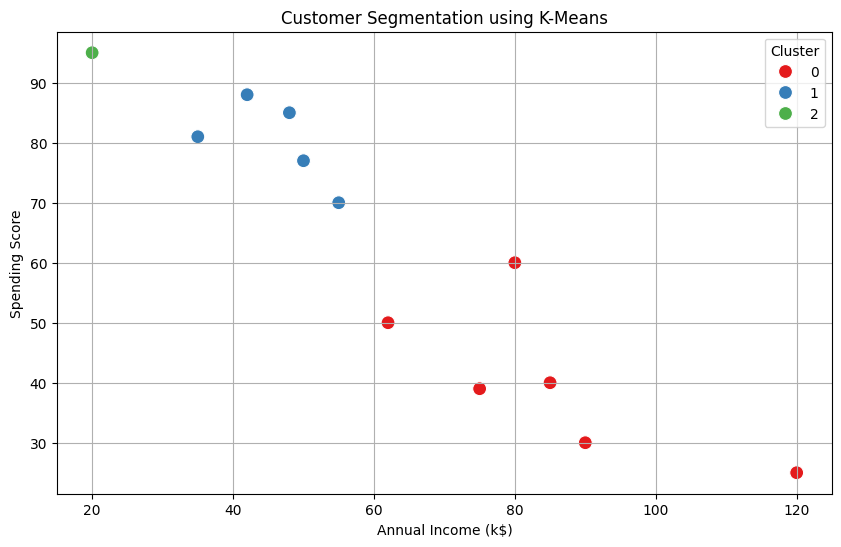

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income(k$)"], y=df["Spending Score"], hue=df["Cluster"], palette="Set1", s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [8]:
print("\n✅ Final Data with Cluster Labels:")
display(df)


✅ Final Data with Cluster Labels:


,CustomerID,Age,Annual Income(k$),Spending Score,Cluster
0,1,22,35,81,1
1,2,34,75,39,0
2,3,25,50,77,1
3,4,45,85,40,0
4,5,52,62,50,0
5,6,23,48,85,1
6,7,41,90,30,0
7,8,36,120,25,0
8,9,29,80,60,0
9,10,60,20,95,2


In [9]:
df.to_csv("segmented_customers.csv", index=False)
print("\n✅ 'segmented_customers.csv' has been saved successfully!")


✅ 'segmented_customers.csv' has been saved successfully!
